# Visualization of using Solar Energy vs Gaz

## Visualizations
Based on the inputs (roof size, location)

Cost Comparison
Line Chart: costs of gas vs. solar 

** should include installation and maintenance over time
** Pie Chart: Breakdown of monthly expenses with solar vs. gas

Environmental Impact
Gauge Chart: Percentage reduction in CO2 emissions by switching to solar and same for Cost

Important
Line Graph: Show when cost solar installation compensated compared to continuing with gas.

Ambitious
Map Overlay: Heatmap of locations better suited for solar energy based on Calgary 

Savings Summary Dashboard
yearly savings, emission reductions and others ??

In [12]:
import matplotlib.pyplot as plt
import numpy as np

time = np.arange(1, 13)

# Random Data kWh from energy per month
solar_energy = np.random.uniform(500, 1000, 12)  
gas_energy = np.random.uniform(800, 1200, 12)

solar_cost = solar_energy * 0.1
gas_cost = gas_energy * 0.15

# Random Data kg CO2 per kWh
solar_emissions = solar_energy * 0.02
gas_emissions = gas_energy * 0.6



# Visualization 1 
## Monthly Energy Cost Per Source

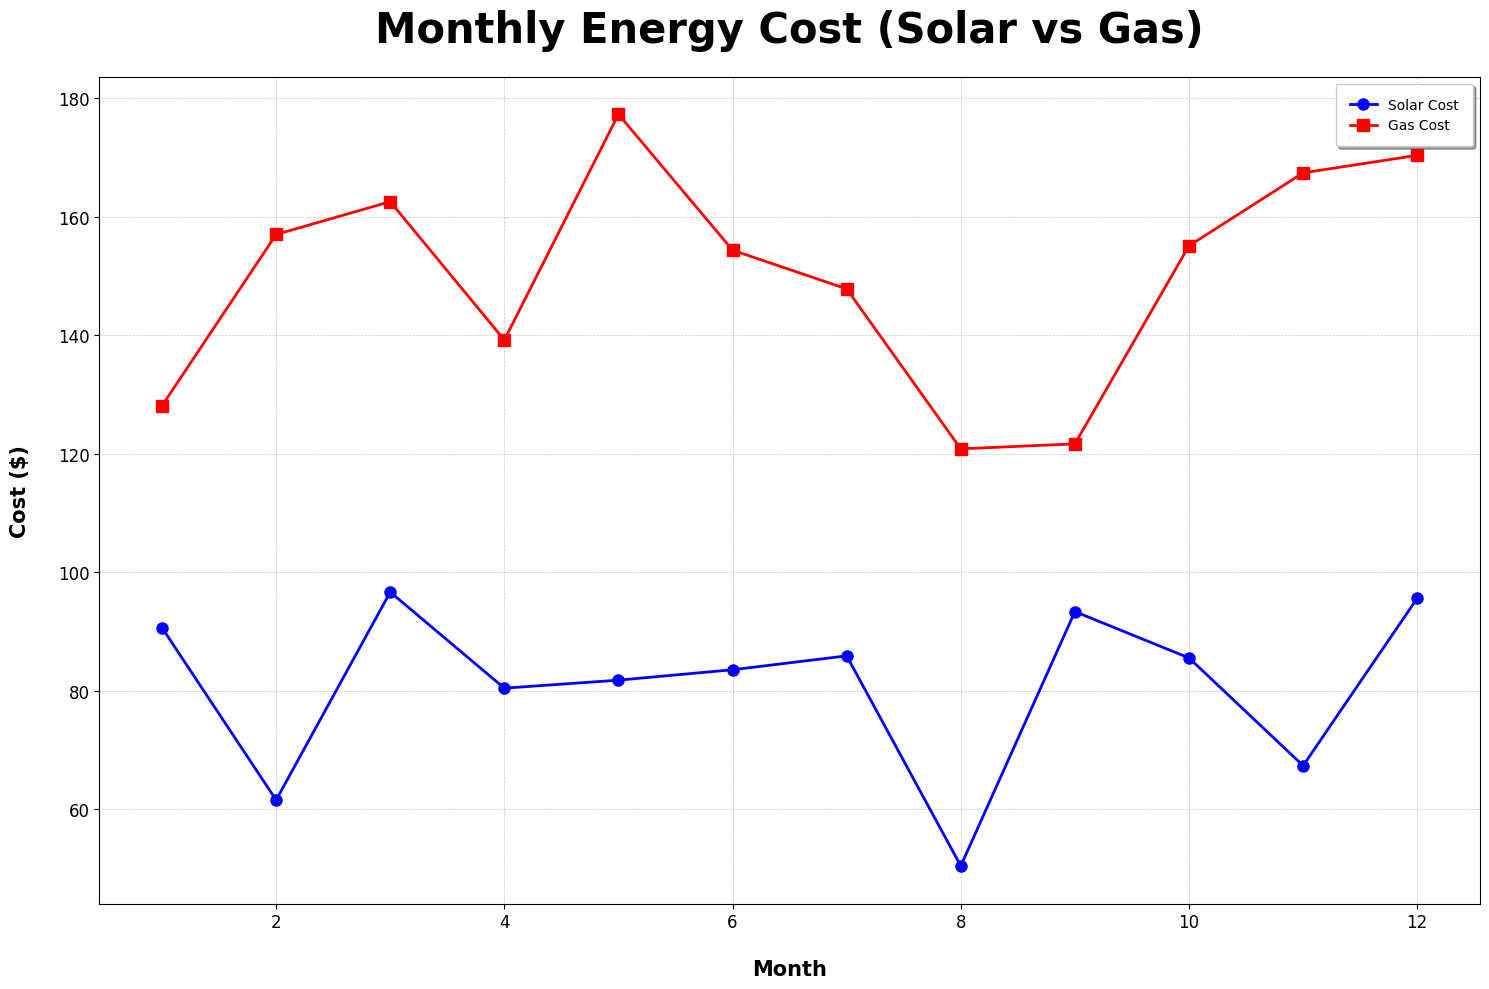

In [13]:
def line_chart(x, y_gas, y_solar, solar_legend_label, gas_legend_label,  x_label, y_label, title):
    plt.figure(figsize=(15, 10))
    plt.plot(x, y_solar, label=solar_legend_label, marker="o", color="blue", linewidth=2, markersize=8)
    plt.plot(x, y_gas, label=gas_legend_label, marker="s", color="red", linewidth=2, markersize=8)
    
    plt.xlabel(x_label, fontsize=15, labelpad=20, weight='bold', loc='center')
    plt.ylabel(y_label, fontsize=15, labelpad=20, weight='bold', loc='center')
    plt.title(title, fontsize=30, pad=25, weight='bold', loc='center')
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True, borderpad=1)
    plt.tight_layout()
    plt.show()

line_chart(time, gas_cost, solar_cost,"Solar Cost", "Gas Cost", "Month", "Cost ($)", "Monthly Energy Cost (Solar vs Gas)")

# Visualization 2 
## Monthly CO2 Emission Per Source

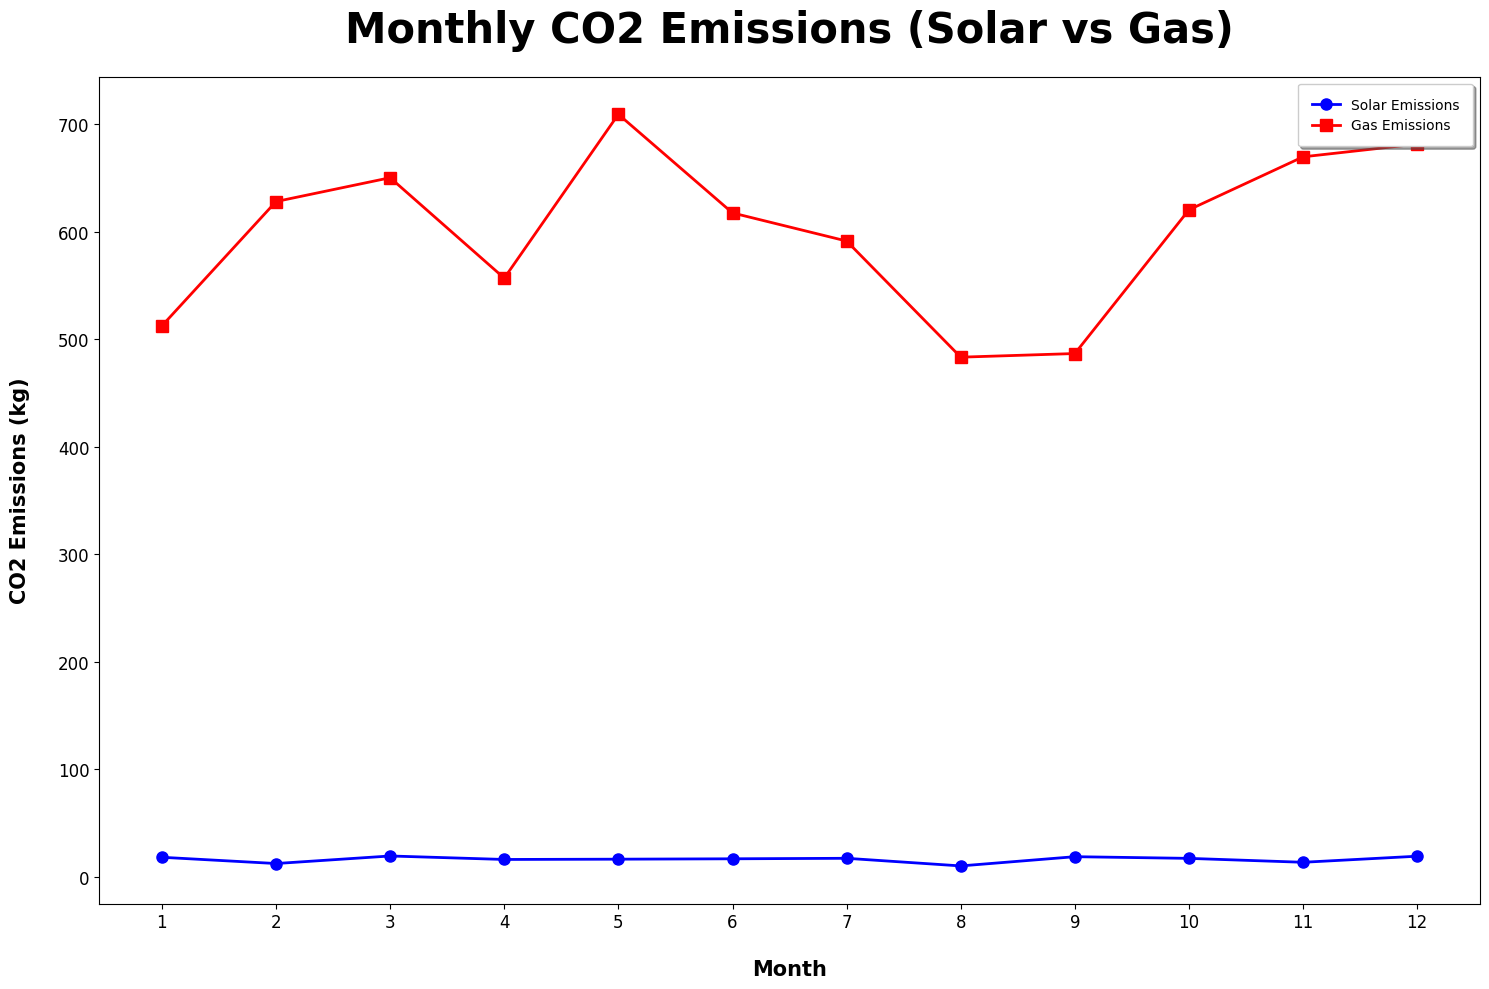

In [14]:
def bar_chart(x, y_gas, y_solar, solar_legend_label, gas_legend_label,  x_label, y_label, title):
    plt.figure(figsize=(15, 10))

    plt.plot(x, y_solar, label=solar_legend_label, marker="o", color="blue", linewidth=2, markersize=8)
    plt.plot(x, y_gas, label=gas_legend_label, marker="s", color="red", linewidth=2, markersize=8)
    
    plt.xlabel(x_label, fontsize=15, labelpad=20, weight='bold', loc='center')
    plt.ylabel(y_label, fontsize=15, labelpad=20, weight='bold', loc='center')
    plt.title(title, fontsize=30, pad=25, weight='bold', loc='center')

    plt.xticks(ticks=x, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True, borderpad=1)
    plt.tight_layout()
    plt.show()

bar_chart(time, gas_emissions, solar_emissions,"Solar Emissions", "Gas Emissions", "Month", "CO2 Emissions (kg)", "Monthly CO2 Emissions (Solar vs Gas)")

# Visualization 3
## Gauge Chart of the amount saved 

In [15]:
import plotly.graph_objects as go
import numpy as np

def gauge_chart(yearly_gas_cost, yearly_solar_cost, title):
    savings_percentage = (yearly_gas_cost - yearly_solar_cost) / yearly_gas_cost * 100

    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=savings_percentage,
        title={'text': title, 'font': {'size': 24, 'color': 'black'}},
        number={
            'suffix': '%',
            'font': {'size': 36, 'color': 'blue'}
        },
        gauge={
            'axis': {'range': [0, 100], 'tickformat': '.0f', 'ticksuffix': '%', 'tickcolor': "black"},
            'bar': {'color': "blue", 'thickness': 0.3},
            'steps': [
                {'range': [0, savings_percentage], 'color': "pink"},
                {'range': [savings_percentage, 100], 'color': "lightgray"},
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': savings_percentage 
            }
        }
    ))

    fig.update_layout(height=400, width=600)
    fig.show()

yearly_gas_cost = np.sum(gas_cost)
yearly_solar_cost = np.sum(solar_cost)
gauge_chart(yearly_gas_cost, yearly_solar_cost, "Yearly Energy Cost Savings")


# Visualization 4
## Pie chart 

In [16]:
import plotly.graph_objects as go

def pie_chart(data):
    labels = list(data.keys())
    values = list(data.values())
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
    fig.show()

data = {'Material Cost': 1500, 'Installation Cost': 500, 'Maintenance Cost': 200}
pie_chart(data)